# SSBCI Loan Analysis

#### Research Question/Hypothesis:

What are the impacts of the State Small Business Credit Initiative loans on economic growth and job creation in US regions? <br>

Can we predict based on the dataset if a loan will be successful at creating and retaining jobs?

#### Predictive Models Used for Regression:

* Univariate Linear Regression 
* Multivariate Linear Regression


#### Predictive Models Used for Classification

* Logistic Regression
* Support Vector Classification
* Gradient Boosting Classifier



In [1]:
# Sources: 
# Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SSBCIData = pd.read_csv('https://raw.githubusercontent.com/ljmancini1/DATA-606-Small-Business-Loans/main/data/SSBCI_data.csv')

In [2]:
SSBCIData.head()

,Unnamed: 0,state_id,program_type,loan_investment_amount,ssbci_original_funds,nonprivate_amount,concurrent_private_financing,borrower_insurance_premium,lender_insurance_premium,guaranteed_amount,...,naics_code,year_incorporated,jobs_created,jobs_retained,trans_type,CDFI_type,SPY_Close,U_Rate,job_benefit,creation_status
0,0,0,4,180000.0,90000.0,0.0,0.0,0.0,0.0,0.0,...,681,103,3.0,1.0,1,2,152.110001,7.5,4.0,1.0
1,1,0,4,2400000.0,250000.0,0.0,0.0,0.0,0.0,0.0,...,439,102,4.0,0.0,1,2,167.509995,7.3,4.0,1.0
2,2,0,4,265000.0,110000.0,0.0,0.0,0.0,0.0,0.0,...,681,103,2.0,5.0,1,2,183.820007,6.7,7.0,1.0
3,3,0,4,199500.0,99750.0,0.0,0.0,0.0,0.0,0.0,...,378,104,8.0,0.0,1,2,181.509995,6.2,8.0,1.0
4,4,0,4,125000.0,62500.0,0.0,125000.0,0.0,0.0,0.0,...,519,97,8.0,0.0,1,2,187.399994,6.3,8.0,1.0


In [3]:
SSBCIData.columns

Index(['Unnamed: 0', 'state_id', 'program_type', 'loan_investment_amount',
       'ssbci_original_funds', 'nonprivate_amount',
       'concurrent_private_financing', 'borrower_insurance_premium',
       'lender_insurance_premium', 'guaranteed_amount', 'collateral_support',
       'ssbci_recycled_funds', 'subsequent_private_financing', 'metro_type',
       'LMI_type', 'revenue', 'full_time_employees', 'naics_code',
       'year_incorporated', 'jobs_created', 'jobs_retained', 'trans_type',
       'CDFI_type', 'SPY_Close', 'U_Rate', 'job_benefit', 'creation_status'],
      dtype='object')

In [4]:
SSBCIData.shape

(21962, 27)

In [5]:
SSBCIData.dtypes

Unnamed: 0                        int64
state_id                          int64
program_type                      int64
loan_investment_amount          float64
ssbci_original_funds            float64
nonprivate_amount               float64
concurrent_private_financing    float64
borrower_insurance_premium      float64
lender_insurance_premium        float64
guaranteed_amount               float64
collateral_support              float64
ssbci_recycled_funds            float64
subsequent_private_financing    float64
metro_type                        int64
LMI_type                          int64
revenue                         float64
full_time_employees             float64
naics_code                        int64
year_incorporated                 int64
jobs_created                    float64
jobs_retained                   float64
trans_type                        int64
CDFI_type                         int64
SPY_Close                       float64
U_Rate                          float64


In [6]:
SSBCIData.isnull().sum()

Unnamed: 0                      0
state_id                        0
program_type                    0
loan_investment_amount          0
ssbci_original_funds            0
nonprivate_amount               0
concurrent_private_financing    0
borrower_insurance_premium      0
lender_insurance_premium        0
guaranteed_amount               0
collateral_support              0
ssbci_recycled_funds            0
subsequent_private_financing    0
metro_type                      0
LMI_type                        0
revenue                         0
full_time_employees             0
naics_code                      0
year_incorporated               0
jobs_created                    0
jobs_retained                   0
trans_type                      0
CDFI_type                       0
SPY_Close                       0
U_Rate                          0
job_benefit                     0
creation_status                 0
dtype: int64

In [7]:
SSBCIData.isna().sum()

Unnamed: 0                      0
state_id                        0
program_type                    0
loan_investment_amount          0
ssbci_original_funds            0
nonprivate_amount               0
concurrent_private_financing    0
borrower_insurance_premium      0
lender_insurance_premium        0
guaranteed_amount               0
collateral_support              0
ssbci_recycled_funds            0
subsequent_private_financing    0
metro_type                      0
LMI_type                        0
revenue                         0
full_time_employees             0
naics_code                      0
year_incorporated               0
jobs_created                    0
jobs_retained                   0
trans_type                      0
CDFI_type                       0
SPY_Close                       0
U_Rate                          0
job_benefit                     0
creation_status                 0
dtype: int64

In [8]:
!pip install mlxtend

## Heatmap

In [9]:
cols2 = ['full_time_employees','metro_type','CDFI_type','SPY_Close','job_benefit']

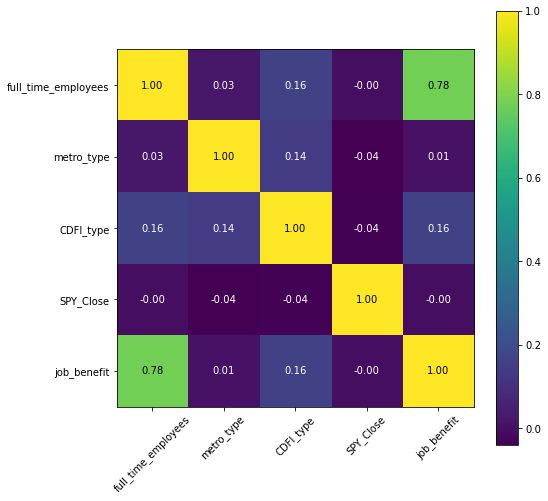

In [10]:
from mlxtend.plotting import heatmap

data = SSBCIData[cols2].dropna()

cm = np.corrcoef(data.values.T)
hm = heatmap(cm, row_names = cols2, column_names = cols2, figsize=(8,8))

plt.show()

# Regression Models

### Univariate Linear Regression Model

**Predictor variable**: Full Time Employees <br>
**Target Variable**: Job Benefit (Jobs Created + Jobs Retained)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Xlin = SSBCIData[['full_time_employees']].values
ylin = SSBCIData['job_benefit'].values


In [14]:
slr = LinearRegression()
reg = slr.fit(Xlin, ylin)
y_pred = slr.predict(Xlin)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.774
Intercept: 2.806


In [15]:
print('R^2 score', reg.score(Xlin, ylin))

R^2 score 0.6026764724377622


In [16]:
slr.coef_

array([0.7739897])

In [17]:
# Sources: 
# Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019
def lin_regplot(Xlin, ylin, model):
    plt.scatter(Xlin, ylin, c='steelblue', edgecolor='white', s=70)
    plt.plot(Xlin, model.predict(Xlin), color='black', lw=2)    
    return 

### Univariate Linear Regression plot shows that the number of full-time employees at the time of the loan closure accounts for about 60% of the variation in the job benefit resulting from the loan.

R<sup>2</sup> score: 0.60

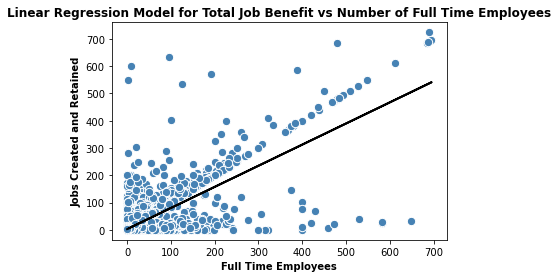

In [18]:
lin_regplot(Xlin, ylin, slr)
plt.title('Linear Regression Model for Total Job Benefit vs Number of Full Time Employees', fontweight='bold')
plt.xlabel('Full Time Employees', fontweight='bold')
plt.ylabel('Jobs Created and Retained', fontweight='bold')


plt.show()

### Multivariate linear regression model results indicate that Full Time Employees, Metro Type, Community Development Financial Institutions (CDFI) Type, and SPY Stock Close price are the strongest predictors for the number of Jobs Created and Jobs Retained.

R<sup>2</sup> score: 0.647

In [19]:
import statsmodels.api as sm
Xlinstats = SSBCIData[['full_time_employees','metro_type','CDFI_type','SPY_Close']].values
ylinstats = SSBCIData['job_benefit'].values
est = sm.OLS(ylinstats, Xlinstats)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          1.007e+04
Date:                Sun, 15 May 2022   Prob (F-statistic):                        0.00
Time:                        13:51:26   Log-Likelihood:                         -96667.
No. Observations:               21962   AIC:                                  1.933e+05
Df Residuals:                   21958   BIC:                                  1.934e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Classification Models

In [20]:
# Used backward and forward selection with Shapley values to select predictor variables
XC = SSBCIData[['ssbci_original_funds','revenue', 'full_time_employees', 
       'jobs_retained','loan_investment_amount','SPY_Close']].values
yc = SSBCIData['creation_status'].values

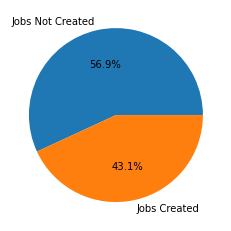

In [21]:
# Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

nonzero_vals = np.count_nonzero(SSBCIData['jobs_created'])/len(SSBCIData['jobs_created'])
zero_vals = 1 - nonzero_vals
percentage = [zero_vals*100, nonzero_vals*100]

mylabels = ['Jobs Not Created', 'Jobs Created']

plt.pie(percentage, labels = mylabels, autopct='%1.1f%%')
plt.show() 

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    XC, yc, test_size=0.3, random_state=1, stratify=yc)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, recall_score


sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=1.0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('Accuracy score')
ac = accuracy_score(y_test, y_pred)
print(ac)
print('Precision score')
pr = precision_score(y_test, y_pred)
print(pr)
print('Recall score')
re = recall_score(y_test, y_pred)
print(re)
print('F1 score')
f1 = f1_score(y_test, y_pred)
print(f1)

Confusion matrix
[[3458  290]
 [2108  733]]
Accuracy score
0.6360601001669449
Precision score
0.7165200391006843
Recall score
0.2580077437521999
F1 score
0.37939958592132506


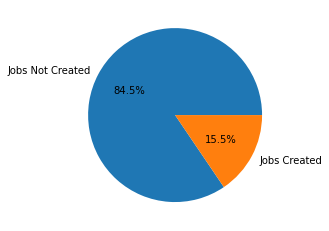

In [25]:
mylabels = ['Jobs Not Created', 'Jobs Created']
nonzero_vals = np.count_nonzero(y_pred)/len(y_pred)
zero_vals = 1-nonzero_vals
percentage = [zero_vals*100, nonzero_vals*100]
plt.pie(percentage, labels = mylabels, autopct='%1.1f%%')
plt.show() 


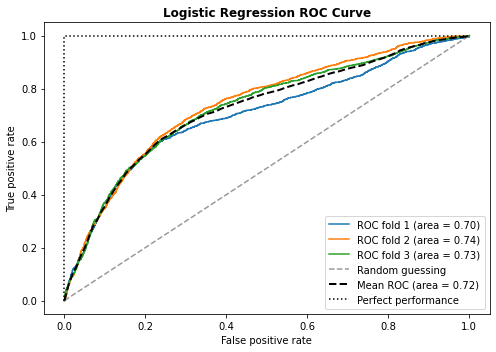

In [26]:
# Source: 
# Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019

from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from numpy import interp


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',
                                           C=1.0))
    

cv = list(StratifiedKFold(n_splits=3).split(X_train_std, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train_std[train],
                         y_train[train]).predict_proba(X_train_std[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title('Logistic Regression ROC Curve', fontweight = 'bold')
plt.tight_layout()
plt.show()

In [27]:
# Source: 
# Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019

# Grid Search for optimizing parameters

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


logreg =LogisticRegression()

param_range = [1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]
param_grid = {'penalty':['l1', 'l2'], 'C': np.linspace(1,10,10), 'solver':['liblinear']}

gs = GridSearchCV(estimator=logreg,
                  param_grid={'penalty': ['l1', 'l2'],
                              'C': np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.])},
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train_std, y_train)
print(gs.best_score_)
print(gs.best_params_)


0.6447665854733649
{'C': 1.0, 'penalty': 'l2'}


/Users/tomkelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tomkelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tomkelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1094, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/tomkelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logi

### Support Vector Classification

In [28]:
from sklearn.svm import SVC

svc = SVC(probability=True, random_state=1, C=100)
svc.fit(X_train_std, y_train)
y_pred_svc = svc.predict(X_test_std)
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('Accuracy score')
ac = accuracy_score(y_test, y_pred_svc)
print(ac)
print('Precision score')
pr = precision_score(y_test, y_pred_svc)
print(pr)
print('Recall score')
re = recall_score(y_test, y_pred_svc)
print(re)
print('F1 score')
f1 = f1_score(y_test, y_pred_svc)
print(f1)

Confusion matrix
[[3155  593]
 [1437 1404]]
Accuracy score
0.6919107603581727
Precision score
0.7030545818728092
Recall score
0.4941921858500528
F1 score
0.5804051260851592


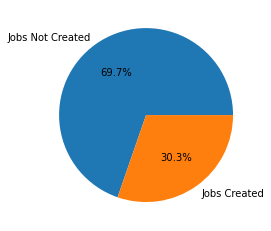

In [29]:
mylabels = ['Jobs Not Created', 'Jobs Created']
nonzero_vals = np.count_nonzero(y_pred_svc)/len(y_pred_svc)
zero_vals = 1-nonzero_vals
percentage = [zero_vals*100, nonzero_vals*100]
plt.pie(percentage, labels = mylabels, autopct='%1.1f%%')
plt.show() 


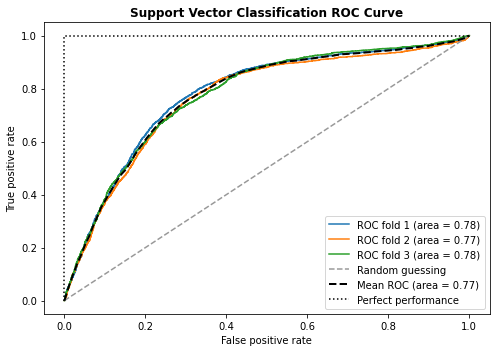

In [30]:
# Source: 
# Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019

pipe_lr = make_pipeline(StandardScaler(),
                        SVC(probability=True, random_state=1, C=100))
    

cv = list(StratifiedKFold(n_splits=3).split(X_train_std, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train_std[train],
                         y_train[train]).predict_proba(X_train_std[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title('Support Vector Classification ROC Curve', fontweight = 'bold')

plt.tight_layout()
plt.show()

### Gradient Boosting Classifier

#### Gradient Boosting Classifier has the highest accuracy for predicting whether jobs were created as a result of the loans. Therefore, this will be the model chosen for predicting whether jobs were created as a direct result of the loans.

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(max_depth=10)
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_boost))
print('Accuracy score')
ac = accuracy_score(y_test, y_pred_boost)
print(ac)
print('Precision score')
pr = precision_score(y_test, y_pred_boost)
print(pr)
print('Recall score')
re = recall_score(y_test, y_pred_boost)
print(re)
print('F1 score')
f1 = f1_score(y_test, y_pred_boost)
print(f1)

Confusion matrix
[[2894  854]
 [ 791 2050]]
Accuracy score
0.7503414782212778
Precision score
0.7059228650137741
Recall score
0.7215769095388948
F1 score
0.7136640557006092


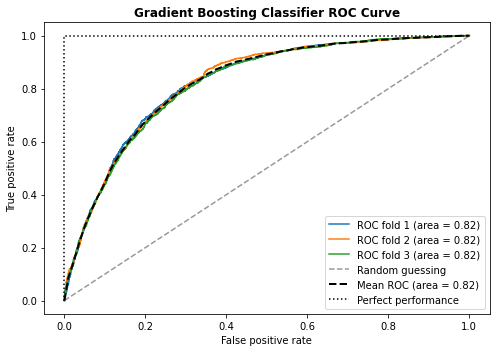

In [32]:
# Sources: 
# Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019

pipe_lr = make_pipeline(GradientBoostingClassifier(max_depth=10))

    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title('Gradient Boosting Classifier ROC Curve', fontweight = 'bold')

plt.tight_layout()
plt.show()

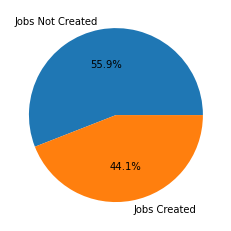

In [33]:
mylabels = ['Jobs Not Created', 'Jobs Created']
nonzero_vals = np.count_nonzero(y_pred_boost)/len(y_pred_boost)
zero_vals = 1-nonzero_vals
percentage = [zero_vals*100, nonzero_vals*100]
plt.pie(percentage, labels = mylabels, autopct='%1.1f%%')
plt.show() 


In [34]:
!pip install shap

#### Shapley values used to select most significant features for the gradient boosing model

* Feature 0: SSBCI Original Funds
* Feature 1: Revenue
* Feature 2: Full Time Employees
* Feature 3: Jobs Retained
* Feature 4: Loan Investment Amount
* Feature 5: SPY Close Price

The plot indicates that Loan Investment Amount had the highest impact on whether jobs were created as a result of the loan.


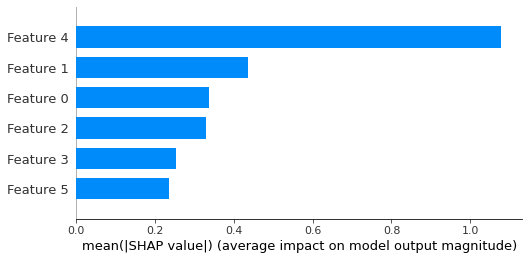

In [35]:
import shap

explainer_km = shap.TreeExplainer(boost)
shap_values_km = explainer_km.shap_values(XC)
shap.summary_plot(shap_values_km, XC, plot_type="bar")